In [1]:
import pandas as pd
import numpy as np
seed = 12345
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

from sklearn.decomposition import PCA
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

weekdays = ['Tue', 'Fri']
var_list = ['Co', 'Gom', 'Env', 'Epg', 'Bbl', 'Rpc', 'Ep']

In [2]:
def standardize(df):
#     if window:
#         rolling_mean = df.rolling(window).mean()
#         rolling_std = df.rolling(window).std()
#         df_scaled = (df - rolling_mean)/ rolling_std
#         return df_scaled.dropna()
#     else:
    return (df - df.mean())/ df.std()

def get_pc1(df_var, scale=False):
    pca = PCA(n_components=1, random_state=seed)
    if scale:
        pca_var = pca.fit_transform(standardize(df_var))
    else:
        pca_var = pca.fit_transform(df_var)
    pca_var = np.squeeze(pca_var)
    return pca_var

def plot_check_pca(pca_var, old_var, title, label='replicated'):
    fig, ax = plt.subplots(figsize=(18,6))
    corr = np.corrcoef(pca_var, old_var).min()
    ax.plot(pca_var, label=f'{label} (Corr={corr:.5f})')
    ax.plot(old_var, '.g', label='old')
    ax.set_title(f'Replicated PCA{title}')
    ax.legend();
    return fig, ax

- save dataframes for each rolling window; independently forecast 8/4-week ahead using parameters fitted in 5-year window
- pca needn't be rolling

In [3]:
from glob import glob
# path = '/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/article_measure/rolling_topic_allocation'
# files = glob(path + '/*.csv')
path = '/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/rolling_combined_info'
files = glob(path + '/*_NYtime_daily_level_measures_C_2023.csv')
files.sort()

In [8]:
df = pd.read_csv(files[60])

In [9]:
df

date  article count   entropy  Unclassified  Unclassified-Sentiment  \
0     20010101             10  2.304974      0.000000            0.000000e+00   
1     20010102             51  2.307304      0.009158            0.000000e+00   
2     20010103            177  2.364377      0.012106           -4.184217e-04   
3     20010104            186  2.284692      0.020499           -6.204757e-04   
4     20010105            164  2.340491      0.020615           -4.481542e-04   
...        ...            ...       ...           ...                     ...   
1301  20051227            106  2.285313      0.009454            0.000000e+00   
1302  20051228            184  2.238825      0.000504            0.000000e+00   
1303  20051229            173  2.161890      0.006387           -6.676162e-05   
1304  20051230            155  2.201922      0.025342           -8.894117e-21   
1305  20060102             34  2.104305      0.011567            0.000000e+00   

       Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
0     0.569289  0.149339  0.162362  0.047934  0.071076  0.000000   
1     0.490605  0.185355  0.138980  0.131409  0.041550  0.002945   
2     0.521546  0.182164  0.189400  0.048342  0.034577  0.011864   
3     0.488352  0.169215  0.171051  0.088004  0.049808  0.013071   
4     0.436142  0.170357  0.225121  0.086931  0.033571  0.027263   
...        ...       ...       ...       ...       ...       ...   
1301  0.425200  0.279833  0.153887  0.037608  0.088277  0.005741   
1302  0.489157  0.226599  0.168022  0.057138  0.053894  0.004686   
1303  0.454430  0.261610  0.157186  0.062031  0.053529  0.004827   
1304  0.438306  0.253872  0.174305  0.067896  0.039957  0.000322   
1305  0.393221  0.184878  0.356628  0.044145  0.007792  0.001768   

      Topic-Sentiment 1  Topic-Sentiment 2  Topic-Sentiment 3  \
0             -0.010373          -0.002859          -0.004308   
1             -0.007258          -0.002400          -0.003353   
2             -0.007324          -0.002505          -0.004138   
3             -0.007327          -0.002023          -0.003996   
4             -0.007084          -0.003364          -0.006915   
...                 ...                ...                ...   
1301          -0.004068          -0.002821          -0.002627   
1302          -0.004878          -0.002879          -0.001631   
1303          -0.002000          -0.002754          -0.001815   
1304          -0.004115          -0.003462          -0.001974   
1305          -0.002037          -0.002475          -0.004672   

      Topic-Sentiment 4  Topic-Sentiment 5  Topic-Sentiment 6  
0             -0.001201           0.000000           0.000000  
1             -0.000144          -0.000386          -0.000063  
2             -0.000972          -0.000764          -0.000224  
3             -0.001295          -0.000521          -0.000097  
4             -0.001607          -0.000616          -0.000272  
...                 ...                ...                ...  
1301          -0.000839          -0.001378          -0.000011  
1302          -0.001136          -0.000414          -0.000040  
1303          -0.001783          -0.000428          -0.000055  
1304          -0.001137          -0.000740           0.000000  
1305          -0.000510          -0.000162          -0.000044  

[1306 rows x 17 columns]

- NOTE: don't classify windows based on UTC dates
- fix dates first and then rerun topic models

<Axes: >

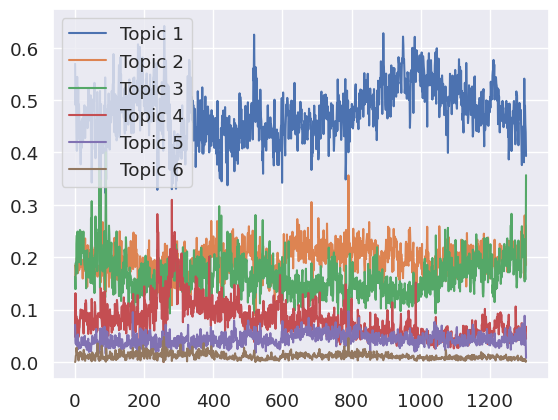

In [10]:
df[[f'Topic {i+1}' for i in range(6)]].plot()

In [12]:
df[[f'Topic {i+1}' for i in range(6)]].sum(axis=1) + df['Unclassified']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1301    1.0
1302    1.0
1303    1.0
1304    1.0
1305    1.0
Length: 1306, dtype: float64

In [13]:
df_all_f = pd.DataFrame(index=pd.read_csv('NYtime_daily_level_measures_C_2023.csv')['date'])
df_all_s = df_all_f.copy()

for i, file in enumerate(tqdm(files)):
    df = pd.read_csv(file)
    df.set_index('date', inplace=True)
    n_topics = sum([i.startswith('Topic ') for i in df.columns])
    df_f = df[[f'Topic {i+1}' for i in range(n_topics)]]
    df_s = df[[f'Topic-Sentiment {i+1}' for i in range(n_topics)]]
    
    df_all_f = df_all_f.join(pd.Series(get_pc1(df_f), index=df_f.index, name=i))
    df_all_s = df_all_s.join(pd.Series(get_pc1(df_s), index=df_s.index, name=i))
    
df_all_f.index = pd.to_datetime(df_all_f.index.astype(str))
df_all_f = df_all_f.resample('4w').mean()
df_all_s.index = pd.to_datetime(df_all_s.index.astype(str))
df_all_s = df_all_s.resample('4w').mean()

100%|█████████████████████████████████████████| 267/267 [00:12<00:00, 20.68it/s]


<Axes: xlabel='date'>

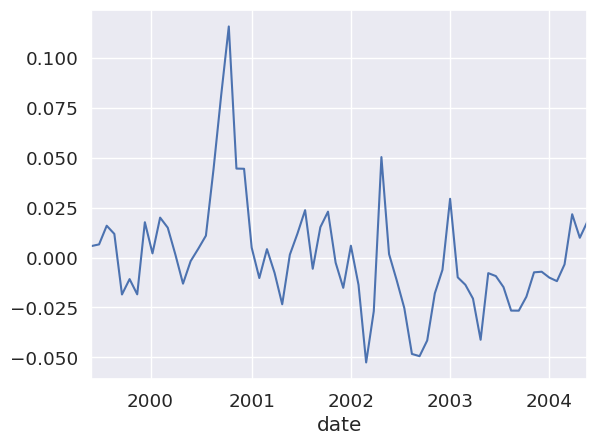

In [17]:
df_all_f[40].dropna().plot()

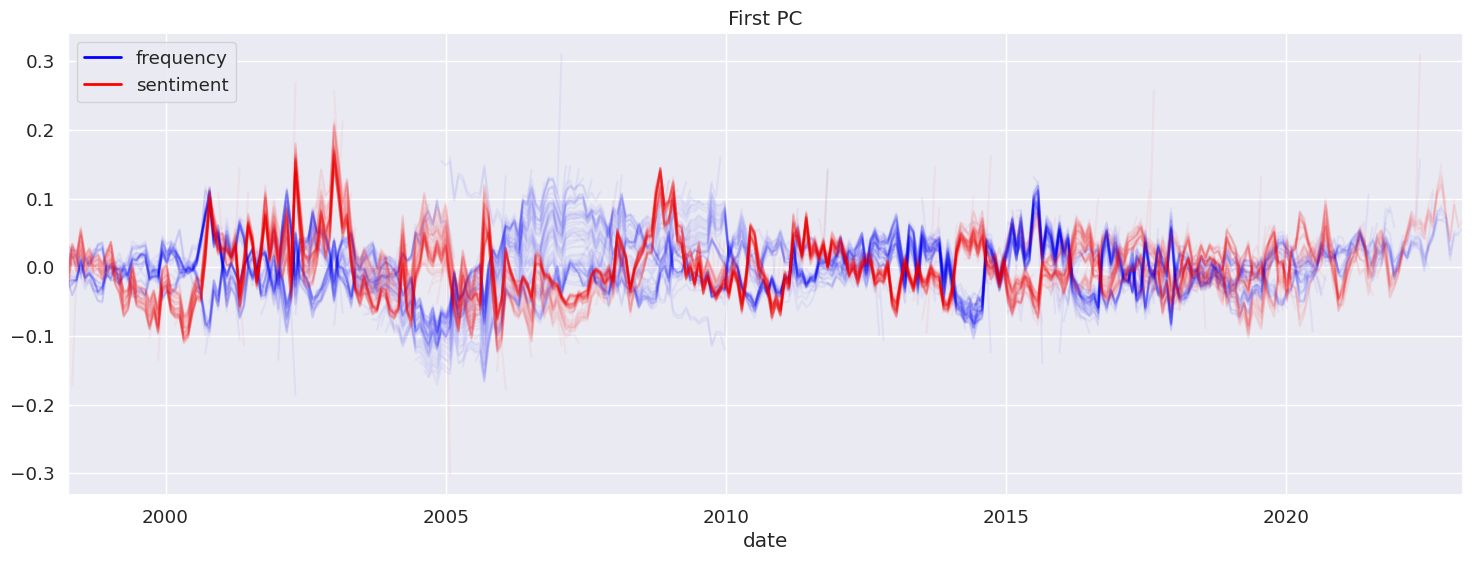

In [15]:
fig, ax = plt.subplots(figsize=(18,6))
df_all_f.plot(ax=ax, legend=False, color='blue', alpha=0.05)
(df_all_s*40).plot(ax=ax, legend=False, color='red', alpha=0.05)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='frequency'),
    Line2D([0], [0], color='red', lw=2, label='sentiment')
]
ax.set_title('First PC')
ax.legend(handles=legend_elements);
fig.savefig('Rolling First PC.pdf')

In [16]:
def read_old_df(end_of_week):
    if end_of_week == 'Fri':
        old = pd.read_stata('transformed_data_prices_v19.dta')
    elif end_of_week == 'Tue':
        old = pd.read_stata('transformed_data_physical_v19.dta')
    old['date'] = old[f'date_{end_of_week}']
    return old

def read_new_df(marker=None):
    if marker:
        df_daily = pd.read_csv(f'NYtime_daily_level_measures_C_2023_{marker}.csv')
    else:
        df_daily = pd.read_csv('NYtime_daily_level_measures_C_2023.csv')
        #df_daily = pd.read_csv('NYtime_daily_level_measures_C_2023.csv')
    df_daily['date'] = pd.to_datetime(df_daily['date'], format='%Y%m%d')
    df_daily.set_index('date', inplace=True)
    return df_daily

def get_df_4wk(df_daily, end_of_week):
    old = read_old_df(end_of_week)
    df_weekly = df_daily.resample(f'W-{end_of_week.upper()}').mean()
    df_4wk = df_weekly.rolling(4).mean()
    df_4wk = df_4wk.merge(old, on='date')
    df_weekly = df_weekly.merge(old, on='date') 
    return df_4wk, df_weekly

def get_new2old(end_of_week, n_topics):
    new2old = {}
    new2old['article count_4wk'] = f'artcount_4wk_{end_of_week}'
    new2old['entropy_4wk'] = f'entropy_4wk_{end_of_week}'
    new2old['entropy'] = f'entropy_{end_of_week}'
    for i in range(n_topics):
        new2old[f'Topic {i+1}_4wk'] = f'ftopic{i+1}_4wk_{end_of_week}'
        new2old[f'Topic-Sentiment {i+1}_4wk'] = f'stopic{i+1}_4wk_{end_of_week}'
    return new2old

def check(end_of_week, marker=None, threshold='2007-07-01', check_type='corr'):
    
    df_daily = read_new_df(marker)
    n_topics = sum([i.startswith('Topic-Sentiment') for i in df_daily.columns])
    df_4wk, df = get_df_4wk(df_daily, end_of_week)
    
    new2old = get_new2old(end_of_week, n_topics)
    oldLabels = [i[:-4] for i in list(new2old.values())]
    df_check = pd.DataFrame(index=['all','prior','post'], columns=oldLabels)
    df_check.index.name = end_of_week
    for new, old in new2old.items():
        if new.endswith('4wk'):
            new_prefix = new[:-4]
            df_sub = df_4wk.dropna(subset=[new_prefix, old])
        else:
            df_sub = df.dropna(subset=[new_prefix, old])
        df_prior = df_sub[df_sub['date'] < threshold]
        df_post = df_sub[df_sub['date'] >= threshold]
        if check_type == 'corr':
            df_check[old[:-4]]['all'] = np.corrcoef(df_sub[new_prefix], df_sub[old]).min()
            df_check[old[:-4]]['prior'] = np.corrcoef(df_prior[new_prefix], df_prior[old]).min()
            df_check[old[:-4]]['post'] = np.corrcoef(df_post[new_prefix], df_post[old]).min()
        elif check_type.startswith('mean'):
            df_check[old[:-4]]['all'] = df_sub[new_prefix].mean() / df_sub[old].mean()
            df_check[old[:-4]]['prior'] = df_prior[new_prefix].mean() / df_prior[old].mean()
            df_check[old[:-4]]['post'] = df_post[new_prefix].mean() / df_post[old].mean()
        elif check_type.startswith('std'):
            df_check[old[:-4]]['all'] = df_sub[new_prefix].std() / df_sub[old].std()
            df_check[old[:-4]]['prior'] = df_prior[new_prefix].std() / df_prior[old].std()
            df_check[old[:-4]]['post'] = df_post[new_prefix].std() / df_post[old].std()
        else:
            df_check = None
    
    return df_check.astype(float)

In [7]:
end_of_week = 'Fri'
old = read_old_df(end_of_week)
df = old.copy()
#n_topics = sum([i.startswith('Topic-Sentiment') for i in df_daily.columns])
for var_prefix in ['f', 's']:
    var_cols = [f"{var_prefix}{var}_{end_of_week}" for var in var_list]
    df[var_cols] = standardize(df[[f'{var_prefix}topic{i+1}_4wk_{end_of_week}' for i in range(7)]])
    assert (df[var_cols] - old[var_cols]).max().max() < 1e-5

In [8]:
for marker in ['acc', 'mod']: # [None]:
    df_daily = read_new_df(marker)
    n_topics = sum([i.startswith('Topic-Sentiment') for i in df_daily.columns])

    for end_of_week in weekdays:

        df_4wk, df_weekly = get_df_4wk(df_daily, end_of_week)

        old = read_old_df(end_of_week)
        df = old.copy()
        df[f'entropy_{end_of_week}'] = df_weekly['entropy']
        df[f'artcount_{end_of_week}'] = df_weekly['article count']
        df[f'entropy_4wk_{end_of_week}'] = df_4wk['entropy']
        df[f'artcount_4wk_{end_of_week}'] = df_4wk['article count']

        fvar_ids = [f'ftopic{i+1}_4wk_{end_of_week}' for i in range(n_topics)]
        svar_ids = [f'stopic{i+1}_4wk_{end_of_week}' for i in range(n_topics)]
        df[fvar_ids] = df_4wk[[f'Topic {i+1}' for i in range(n_topics)]]
        df[svar_ids] = df_4wk[[f'Topic-Sentiment {i+1}' for i in range(n_topics)]]

        fvar_names = [f'f{var}_{end_of_week}' for var in var_list]
        svar_names = [f's{var}_{end_of_week}' for var in var_list]
        df[fvar_names] = standardize(df[fvar_ids])
        df[svar_names] = standardize(df[svar_ids])

        na_rows = df[fvar_names].isna().max(axis=1).sum()
        df[f'PCAfreq_{end_of_week}'] = [np.nan]*na_rows + list(get_pc1(df[fvar_names][na_rows:]))
        df[f'PCAsent_{end_of_week}'] = [np.nan]*na_rows + list(get_pc1(df[svar_names][na_rows:]))
        df[f'PCAall_{end_of_week}'] = [np.nan]*na_rows + list(get_pc1(df[fvar_names+svar_names][na_rows:]))

        df.drop(columns='date', inplace=True)
        
        if end_of_week == 'Fri':
            df.to_stata(f'transformed_data_prices_v19.2_{marker}.dta', write_index=False)
        elif end_of_week == 'Tue':
            df.to_stata(f'transformed_data_physical_v19.2_{marker}.dta', write_index=False)

In [9]:
marker = 'acc'
new = pd.read_stata(f'transformed_data_prices_v19.2_{marker}.dta')
old = pd.read_stata('transformed_data_prices_v19.dta')
assert new.columns.to_list() == old.columns.to_list()

print(np.corrcoef(new['PCAfreq_Fri'][3:], old['PCAfreq_Fri'][3:]).min())
print(np.corrcoef(new['PCAsent_Fri'][3:], old['PCAsent_Fri'][3:]).min())
print(np.corrcoef(new['PCAall_Fri'][3:], old['PCAall_Fri'][3:]).min())
print(np.corrcoef(new['fCo_Fri'][3:], old['fCo_Fri'][3:]).min())
print(np.corrcoef(new['sCo_Fri'][3:], old['sCo_Fri'][3:]).min())

print(np.corrcoef(new['entropy_Fri'][3:], old['entropy_Fri'][3:]).min())
print(np.corrcoef(new['artcount_Fri'][3:], old['artcount_Fri'][3:]).min())
print(np.corrcoef(new['entropy_4wk_Fri'][3:], old['entropy_4wk_Fri'][3:]).min())
print(np.corrcoef(new['artcount_4wk_Fri'][3:], old['artcount_4wk_Fri'][3:]).min())

0.967792052978149
-0.9651994951149508
0.9761612822142484
0.990553096578657
0.9381732072211577
0.9597938402804278
0.9215053594651071
0.9982633269637993
0.9808940877946377


In [10]:
new = pd.read_stata('transformed_data_physical_v19.2.dta')
old = pd.read_stata('transformed_data_physical_v19.dta')
assert new.columns.to_list() == old.columns.to_list()

print(np.corrcoef(new['PCAfreq_Tue'][3:], old['PCAfreq_Tue'][3:]).min())
print(np.corrcoef(new['PCAsent_Tue'][3:], old['PCAsent_Tue'][3:]).min())
print(np.corrcoef(new['PCAall_Tue'][3:], old['PCAall_Tue'][3:]).min())
print(np.corrcoef(new['fCo_Tue'][3:], old['fCo_Tue'][3:]).min())
print(np.corrcoef(new['sCo_Tue'][3:], old['sCo_Tue'][3:]).min())

print(np.corrcoef(new['entropy_Tue'][3:], old['entropy_Tue'][3:]).min())
print(np.corrcoef(new['artcount_Tue'][3:], old['artcount_Tue'][3:]).min())
print(np.corrcoef(new['entropy_4wk_Tue'][3:], old['entropy_4wk_Tue'][3:]).min())
print(np.corrcoef(new['artcount_4wk_Tue'][3:], old['artcount_4wk_Tue'][3:]).min())

0.9869819849957037
0.9990014228245229
0.992382258615763
0.9974066463893493
0.9970466781210583
0.9663191135846395
0.9215797198613641
0.9982742991349313
0.9809323917153644


In [11]:
df = pd.read_csv('/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/concat/info_concatenate.csv')
df[[f'Topic{i+1}' for i in range(7)]].sum(axis=1)

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2280522    0.0
2280523    0.0
2280524    1.0
2280525    1.0
2280526    0.0
Length: 2280527, dtype: float64

- sXX are standardized stopic_4wk series => add to readme & comment
- why dropping fCo: 7 topic freq add up to 1?
- unclassified: article does not include any words from clustering_C.csv, so the sum of 7 topic allocations is 0

In [12]:
# need to be standardized
pd.read_stata('transformed_data_prices_v19.1.dta').columns

Index(['date_Fri', 'artcount_4wk_Fri', 'entropy_4wk_Fri', 'stopic1_4wk_Fri',
       'stopic2_4wk_Fri', 'stopic3_4wk_Fri', 'stopic4_4wk_Fri',
       'stopic5_4wk_Fri', 'stopic6_4wk_Fri', 'stopic7_4wk_Fri',
       'ftopic1_4wk_Fri', 'ftopic2_4wk_Fri', 'ftopic3_4wk_Fri',
       'ftopic4_4wk_Fri', 'ftopic5_4wk_Fri', 'ftopic6_4wk_Fri',
       'ftopic7_4wk_Fri', 'PCAfreq_Fri', 'PCAsent_Fri', 'PCAall_Fri'],
      dtype='object')

In [13]:
pd.read_stata('transformed_data_prices_v19.dta').columns

Index(['date_Tue', 'date_Wed', 'date_Thu', 'date_Fri', 'date_Mon',
       'FutRet_Fri', 'WIPI_4wk_monthly', 'WIPI_8wk_monthly', 'DSpot_Fri',
       'xomRet_Thu', 'bpRet_Thu', 'rdsaRet_Fri', 'StkIdx_ThFr', 'sp500Ret_Thu',
       'DProd_Wed', 'DInv_Wed', 'DFX_Thu', 'DOilVol_Thu', 'OilVol_Thu',
       'VIX_Thu', 'tnote_10y_Thu', 'basis_Fri', 'trend', 'artcount_4wk_Fri',
       'entropy_4wk_Fri', 'stopic1_4wk_Fri', 'ftopic1_4wk_Fri',
       'stopic2_4wk_Fri', 'ftopic2_4wk_Fri', 'stopic3_4wk_Fri',
       'ftopic3_4wk_Fri', 'stopic4_4wk_Fri', 'ftopic4_4wk_Fri',
       'stopic5_4wk_Fri', 'ftopic5_4wk_Fri', 'stopic6_4wk_Fri',
       'ftopic6_4wk_Fri', 'stopic7_4wk_Fri', 'ftopic7_4wk_Fri', 'entropy_Fri',
       'artcount_Fri', 'sCo_Fri', 'fCo_Fri', 'sGom_Fri', 'fGom_Fri',
       'sEnv_Fri', 'fEnv_Fri', 'sEpg_Fri', 'fEpg_Fri', 'sBbl_Fri', 'fBbl_Fri',
       'sRpc_Fri', 'fRpc_Fri', 'sEp_Fri', 'fEp_Fri', 'FutRet_t4_Fri',
       'FutRet_t8_Fri', 'DSpot_t4_Fri', 'DSpot_t8_Fri', 'xomRet_t4_Fri',
    

- include more: 'entropy_Fri',
       'artcount_Fri', 'sCo_Fri', 'fCo_Fri', 'sGom_Fri', 'fGom_Fri',
       'sEnv_Fri', 'fEnv_Fri', 'sEpg_Fri', 'fEpg_Fri', 'sBbl_Fri', 'fBbl_Fri',
       'sRpc_Fri', 'fRpc_Fri', 'sEp_Fri', 'fEp_Fri'
- v19.2 include all variables with new text concern (82 columns)

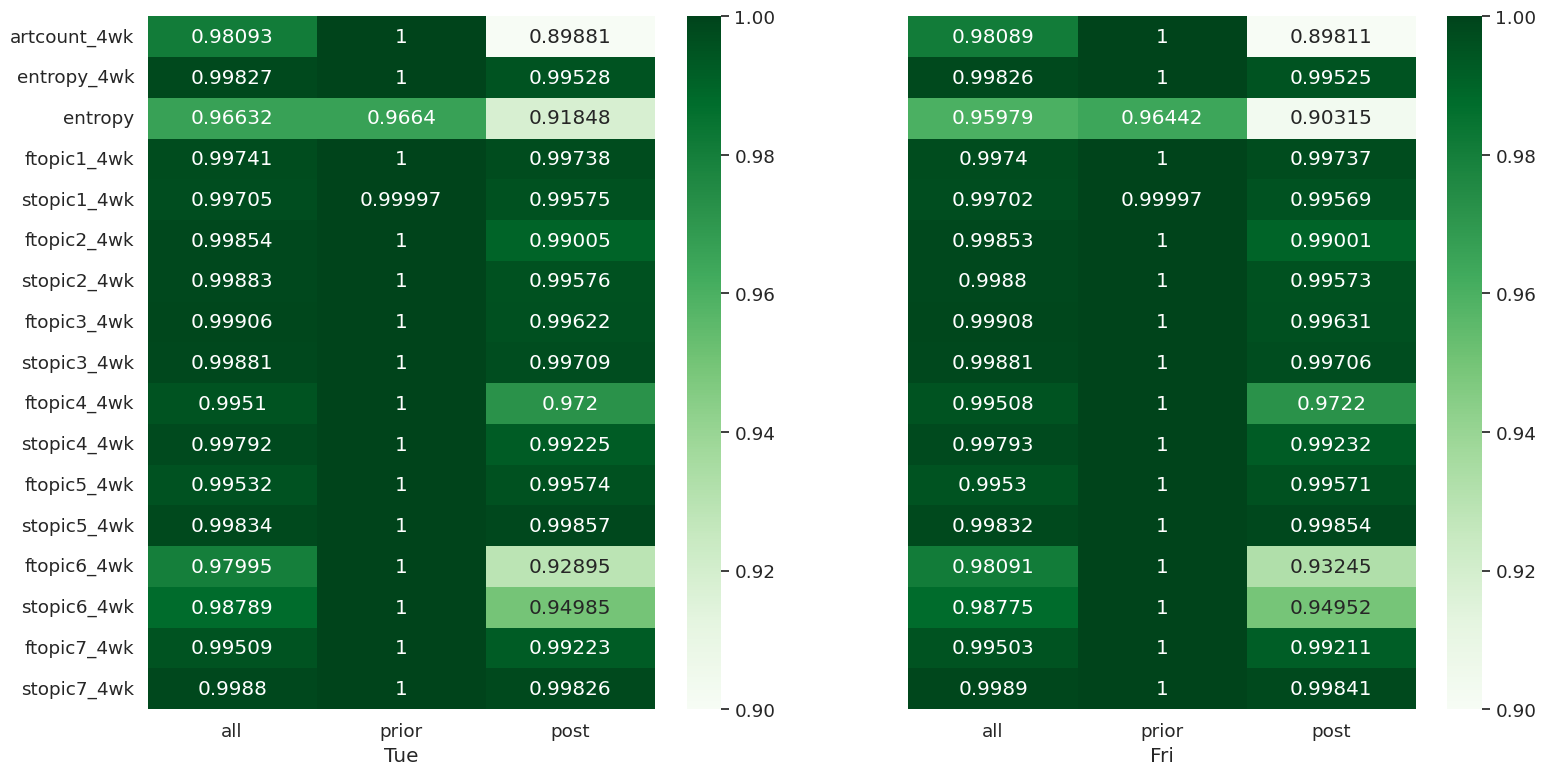

In [17]:
fig, ax = plt.subplots(figsize=(18,9), nrows=1, ncols=len(weekdays))
for i, end_of_week in enumerate(weekdays):
    sns.heatmap(check(end_of_week).T, annot=True, fmt='.5g', 
                cmap='Greens', vmin=0.9, vmax=1, ax=ax[i]);
    if i!=0:
        ax[i].set_yticklabels([])
plt.savefig('corr.pdf')

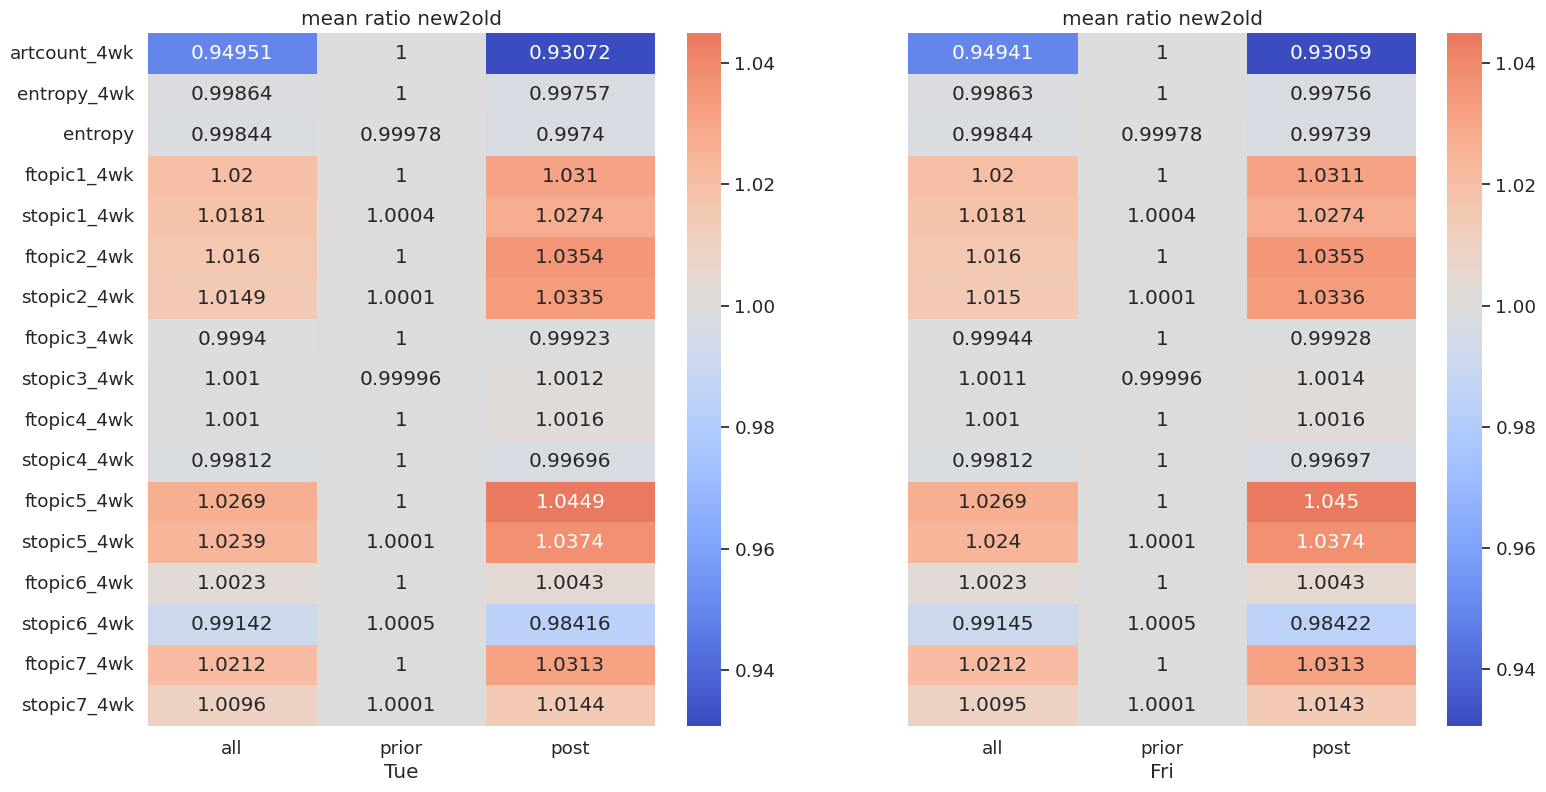

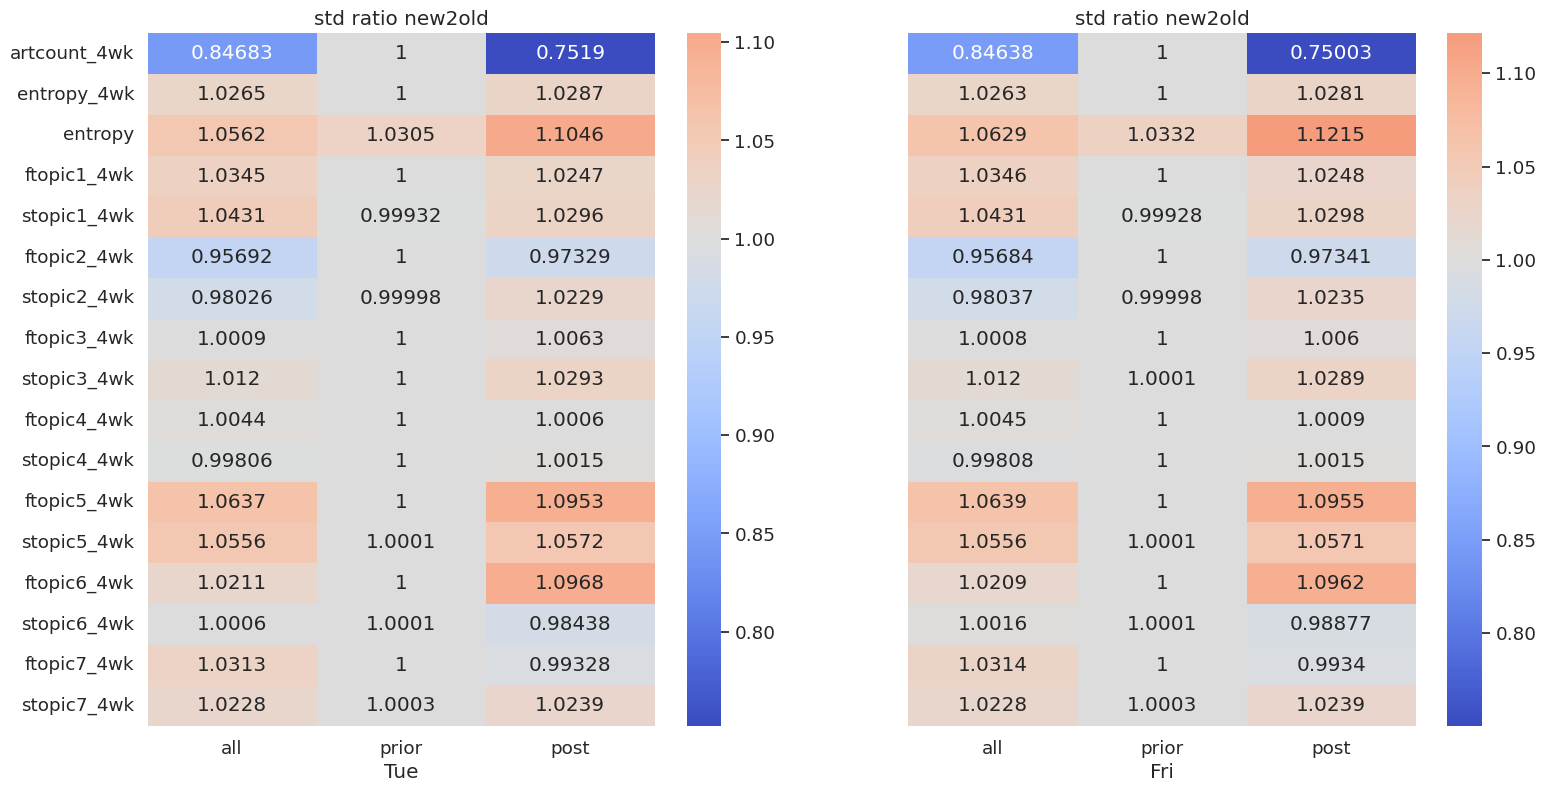

In [18]:
for title in ['mean ratio new2old', 'std ratio new2old']:
    fig, ax = plt.subplots(figsize=(18,9), nrows=1, ncols=len(weekdays))
    for i, end_of_week in enumerate(weekdays):
        sns.heatmap(check(end_of_week, check_type=title).T, annot=True, fmt='.5g', 
                    cmap='coolwarm', center=1, ax=ax[i]);
        ax[i].set_title(title)
        if i!=0:
            ax[i].set_yticklabels([])
    plt.savefig(f'{title}.pdf')

# PCA

## Reproducibility

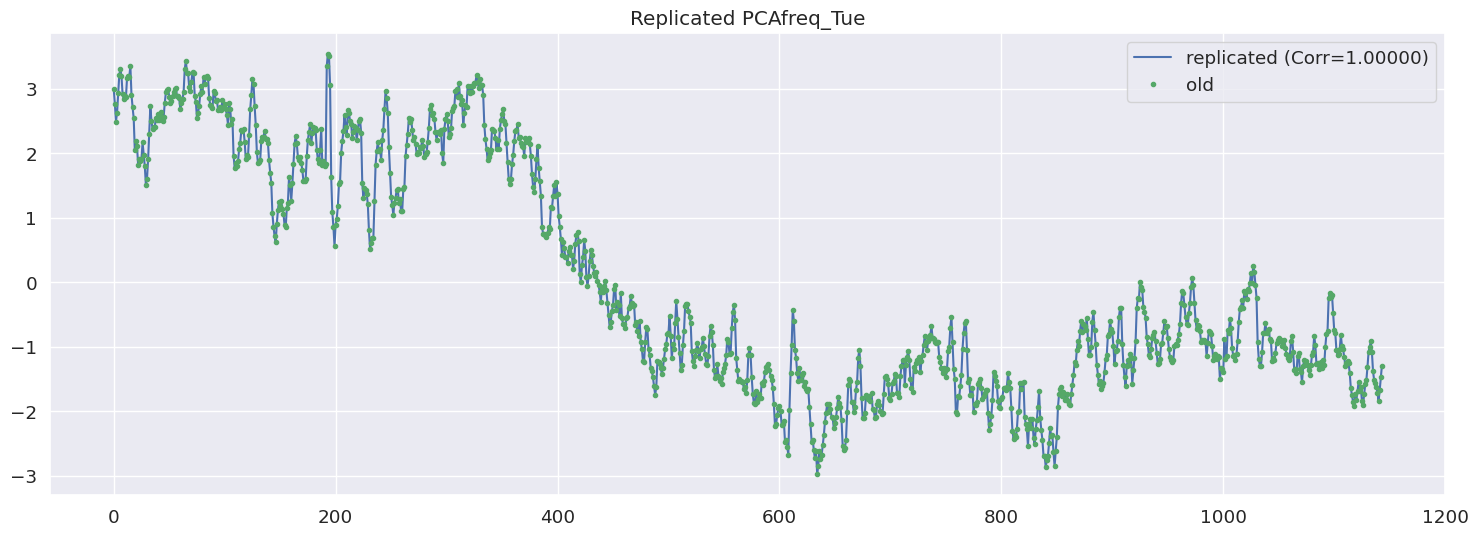

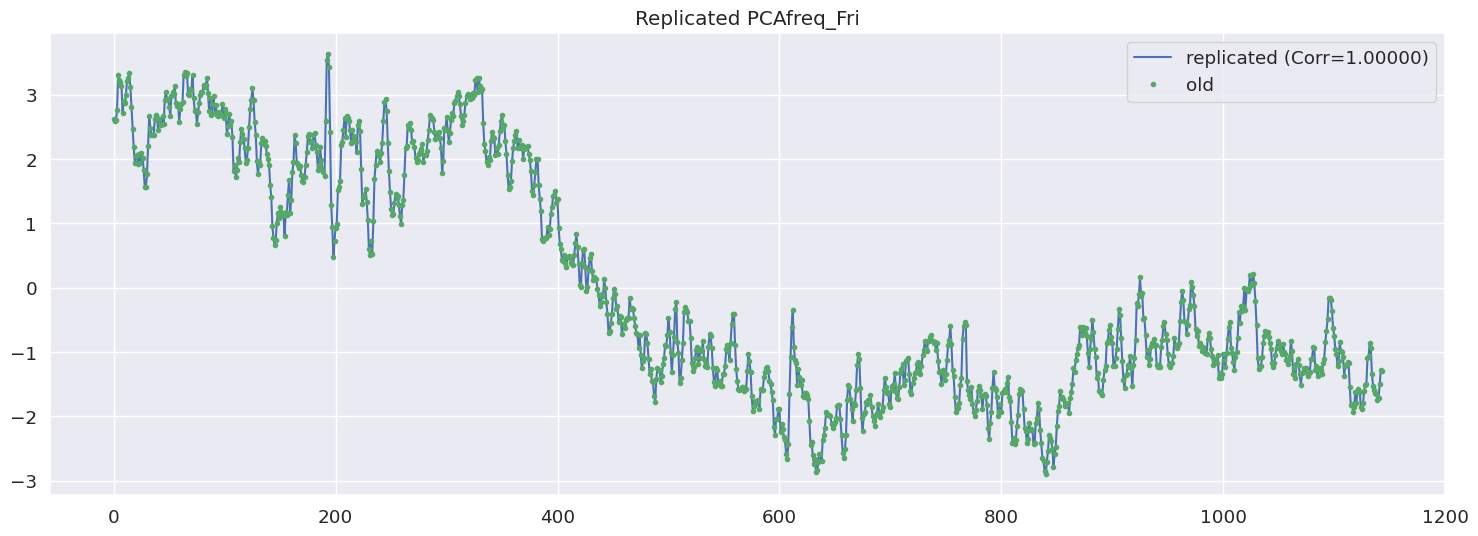

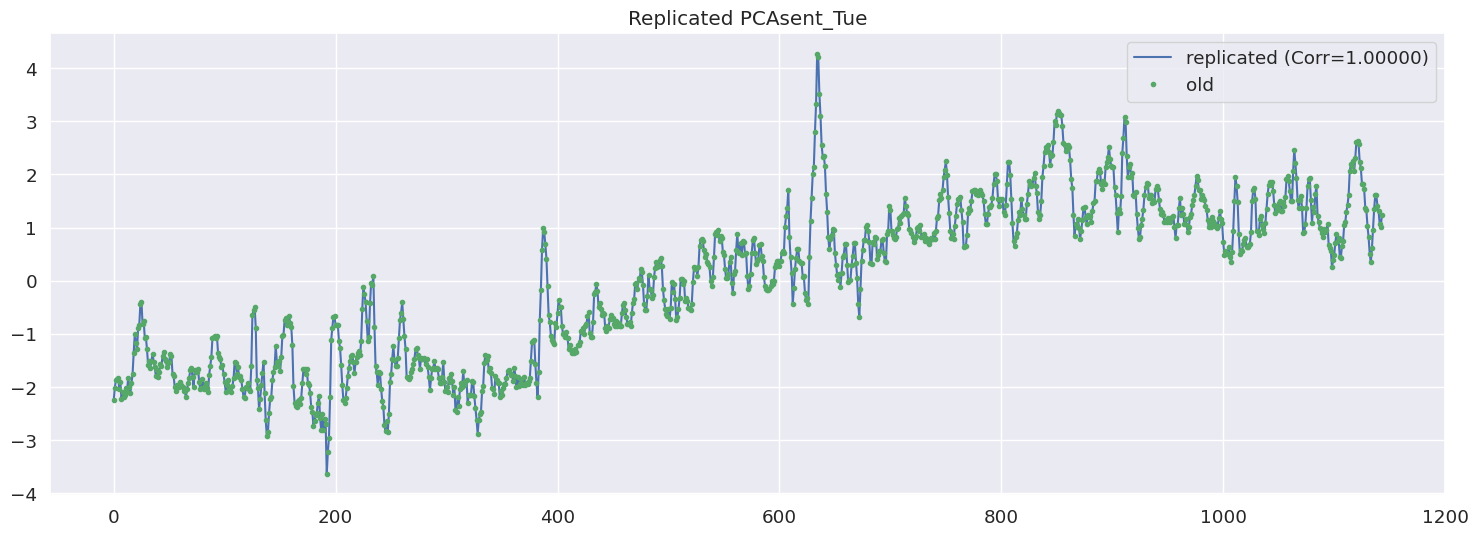

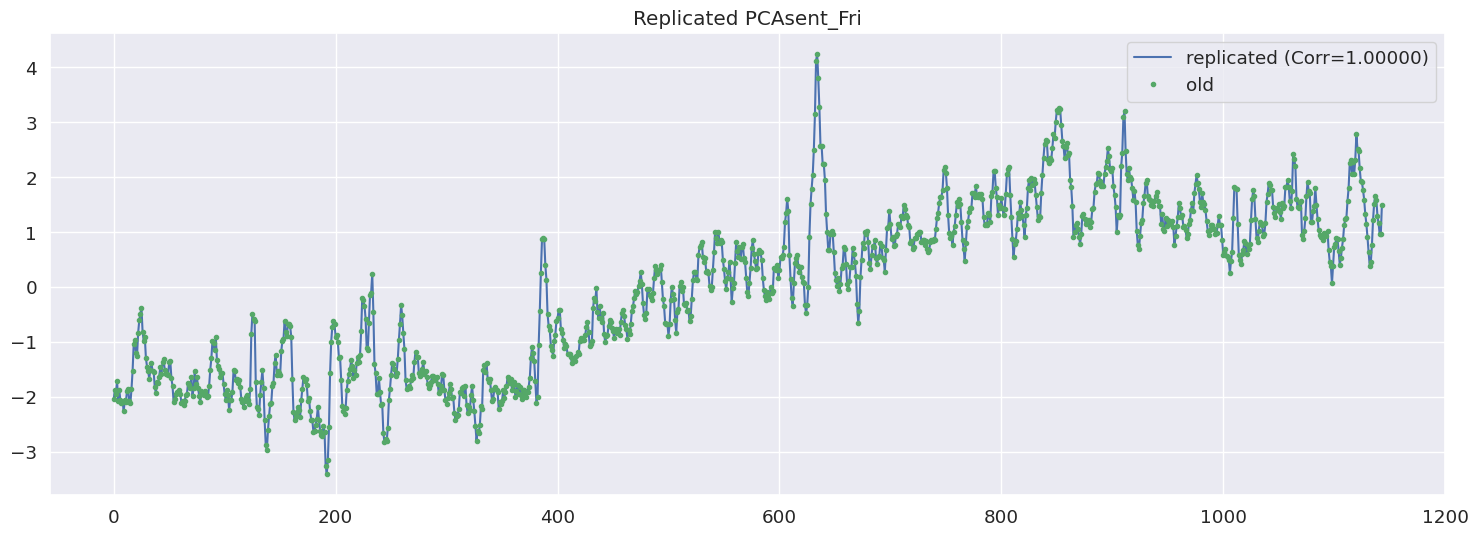

In [19]:
var_list = ['Co', 'Gom', 'Env', 'Epg', 'Bbl', 'Rpc', 'Ep']

for pca_var_name in ['freq', 'sent']:
    for end_of_week in weekdays:

        old = read_old_df(end_of_week)
        old_var = old[f'PCA{pca_var_name}_{end_of_week}'].dropna().values
        #freq_vars = [f'ftopic{i+1}_4wk_{end_of_week}' for i in range(n_topics)]
        col_vars = [f'{pca_var_name[0]}{i}' for i in var_list]
        col_vars_drop = col_vars.copy()
        try:
            col_vars_drop.remove(f'fCo')
        except ValueError:
            pass
        df_var = old[[f'{i}_{end_of_week}' for i in col_vars_drop]].dropna()
        pca_var = get_pc1(df_var)
        
        plot_check_pca(pca_var, old_var, title=f'{pca_var_name}_{end_of_week}')

## Non-determinism of PCA from sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- need to set seed
- error is small

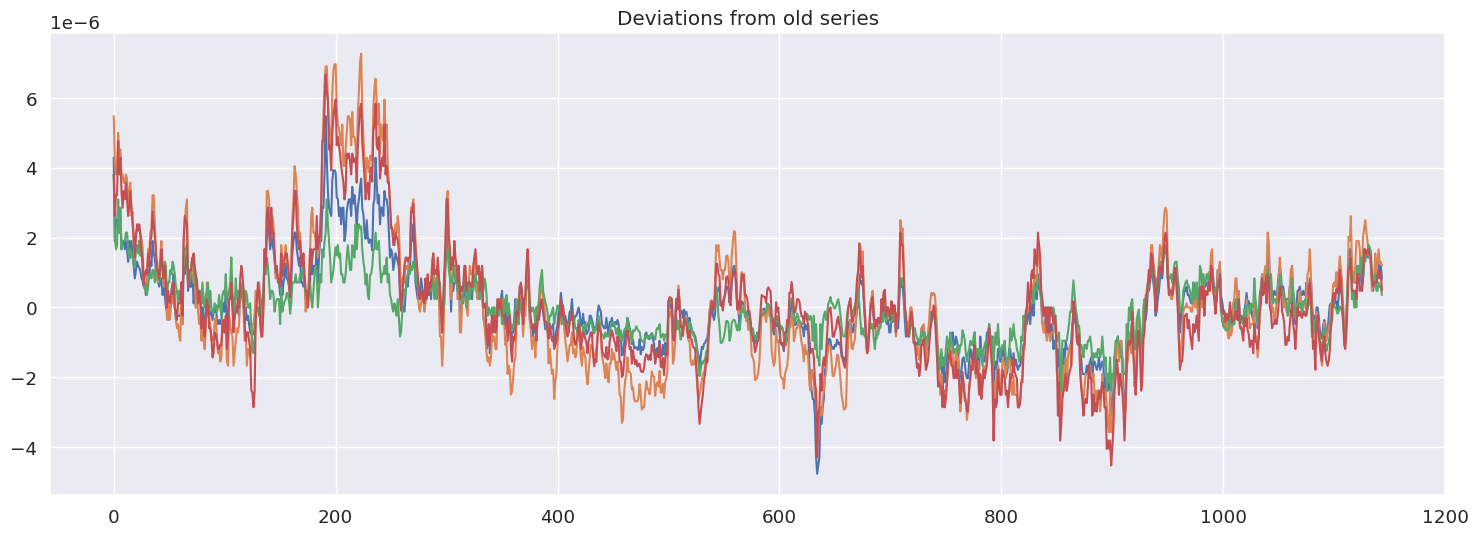

In [20]:
error_list = []
for _ in range(4):
    pca = PCA(n_components=1)
    pca_var = pca.fit_transform(df_var)
    pca_var = np.squeeze(pca_var)
    error_list.append(pca_var-old_var)
    
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(np.array(error_list).T)
ax.set_title('Deviations from old series');

## What if: include 'fCo'

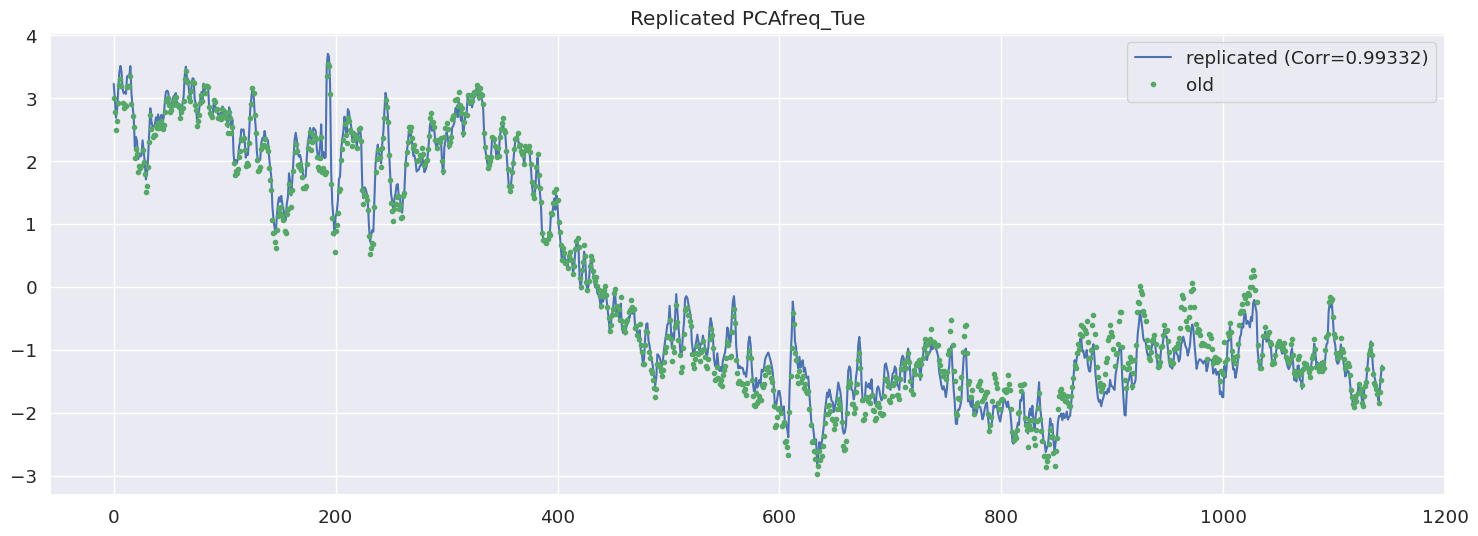

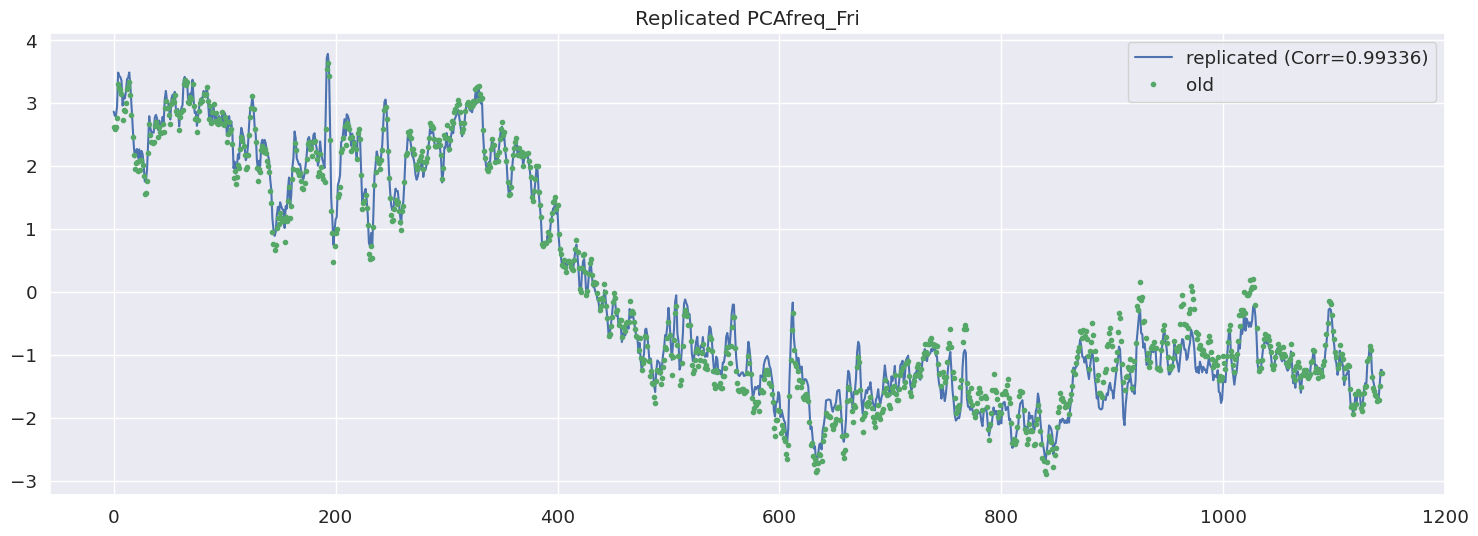

In [21]:
for pca_var_name in ['freq']:
    for end_of_week in weekdays:

        old = read_old_df(end_of_week)
        old_var = old[f'PCA{pca_var_name}_{end_of_week}'].dropna().values
        #freq_vars = [f'ftopic{i+1}_4wk_{end_of_week}' for i in range(n_topics)]
        col_vars = [f'{pca_var_name[0]}{i}' for i in var_list]
        df_var = old[[f'{i}_{end_of_week}' for i in col_vars]].dropna()
        pca_var = get_pc1(df_var)
        plot_check_pca(pca_var, old_var, title=f'{pca_var_name}_{end_of_week}')

## Decomposing 7 standardized series

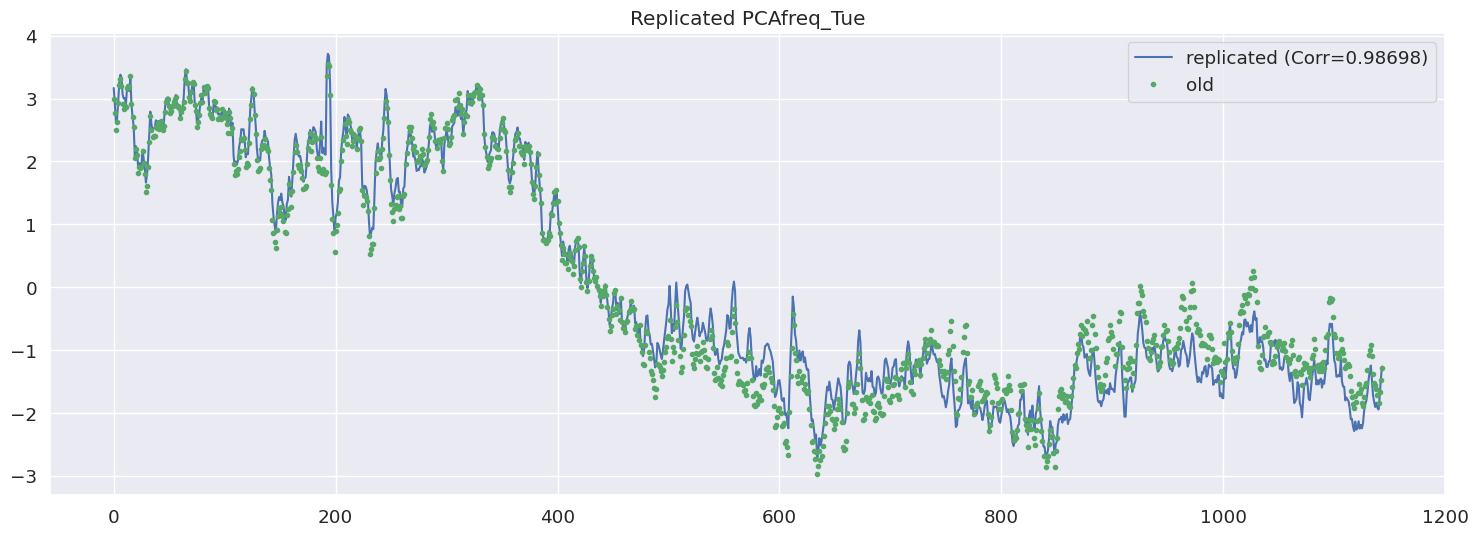

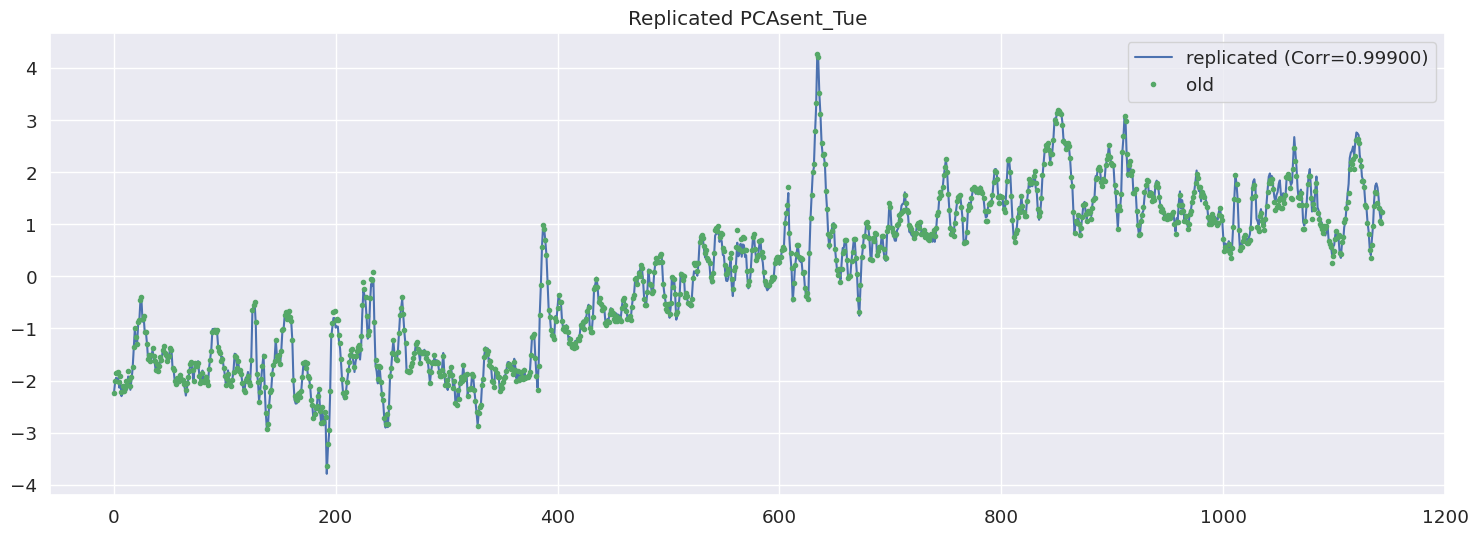

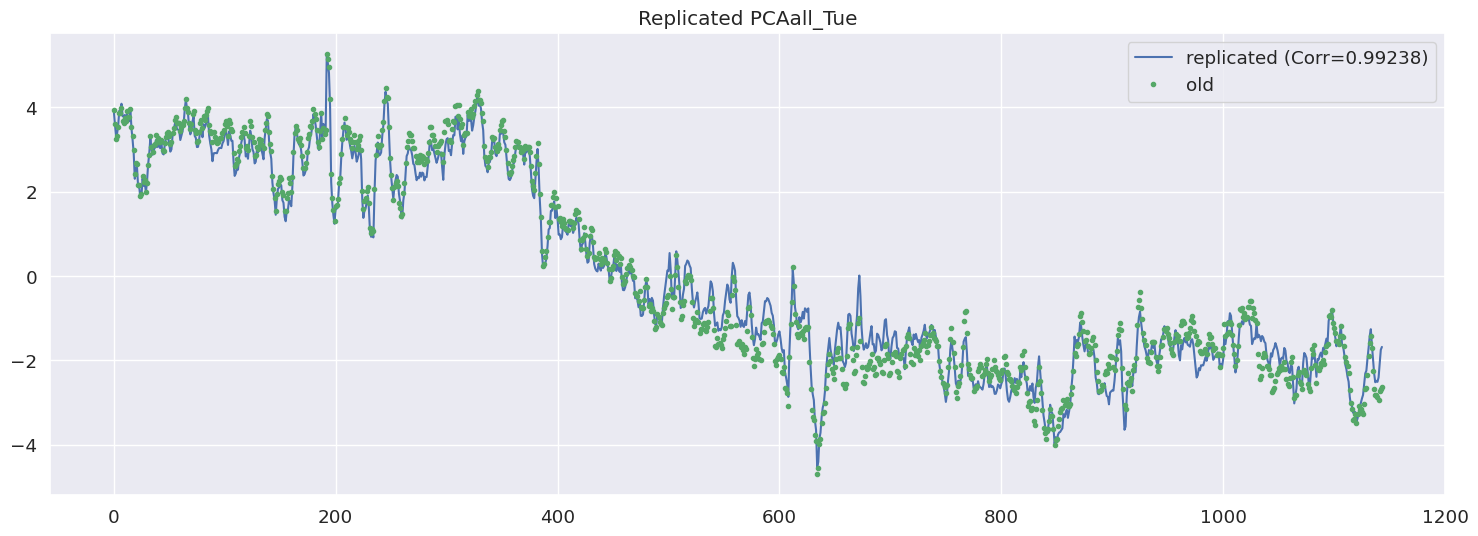

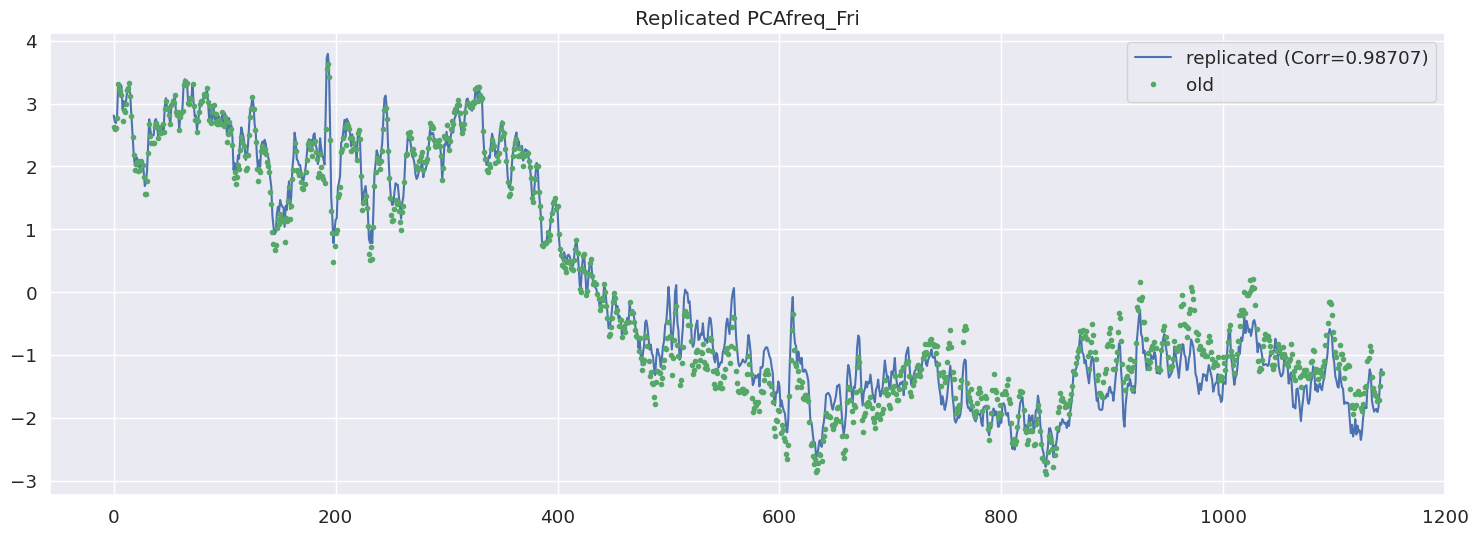

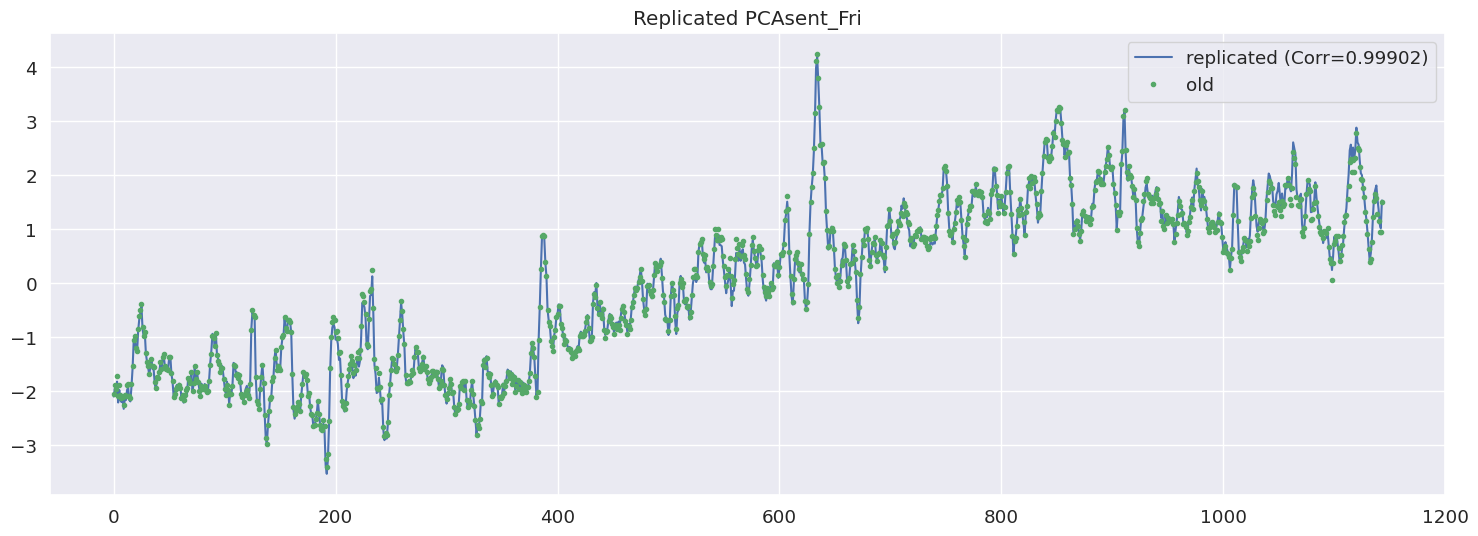

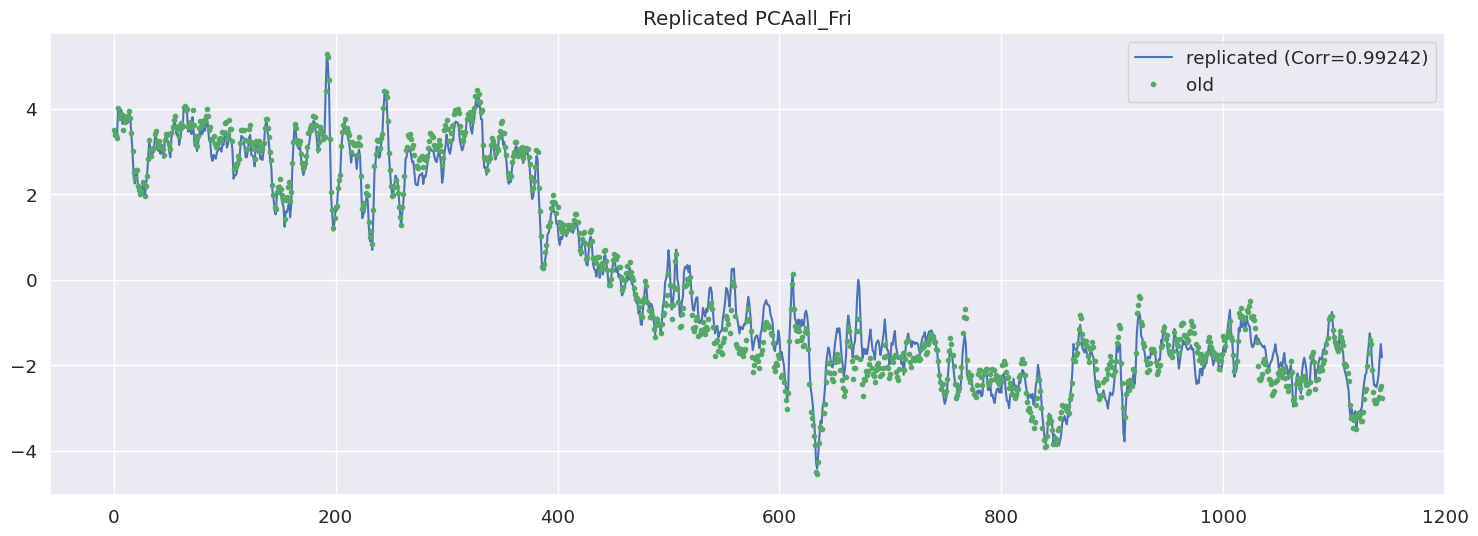

In [22]:
df_daily = read_new_df()
n_topics = sum([i.startswith('Topic-Sentiment') for i in df_daily.columns])

freq_vars = [f'Topic {i+1}' for i in range(n_topics)]
sent_vars = [f'Topic-Sentiment {i+1}' for i in range(n_topics)]
reg_cols = ['date', 'artcount_4wk', 'entropy_4wk']+\
            [f'stopic{i+1}_4wk' for i in range(n_topics)]+\
            [f'ftopic{i+1}_4wk' for i in range(n_topics)]

for end_of_week in weekdays:

    old = read_old_df(end_of_week)
    df = old[[f'{i}_{end_of_week}' for i in reg_cols]].dropna().copy()
    
    for pca_var_name, col_vars in zip(['freq', 'sent', 'all'], [freq_vars, sent_vars, freq_vars+sent_vars]):
        old_var = old[f'PCA{pca_var_name}_{end_of_week}'].dropna().values

        df_4wk, _ = get_df_4wk(df_daily, end_of_week)
        df_var = df_4wk[col_vars].dropna()
        if len(df_var) - len(old_var) == 1:
            df_var = df_var.iloc[1:]
        pca_var = get_pc1(df_var, scale=True)
        plot_check_pca(pca_var, old_var, title=f'{pca_var_name}_{end_of_week}')
        
        df[f'PCA{pca_var_name}_{end_of_week}'] = pca_var
        
    if end_of_week == 'Fri':
        df.to_stata('transformed_data_prices_v19.1.dta', write_index=False)
    elif end_of_week == 'Tue':
        df.to_stata('transformed_data_physical_v19.1.dta', write_index=False)

## Rolling PCA

100%|█████████████████████████████████████████████| 3/3 [00:06<00:00,  2.17s/it]


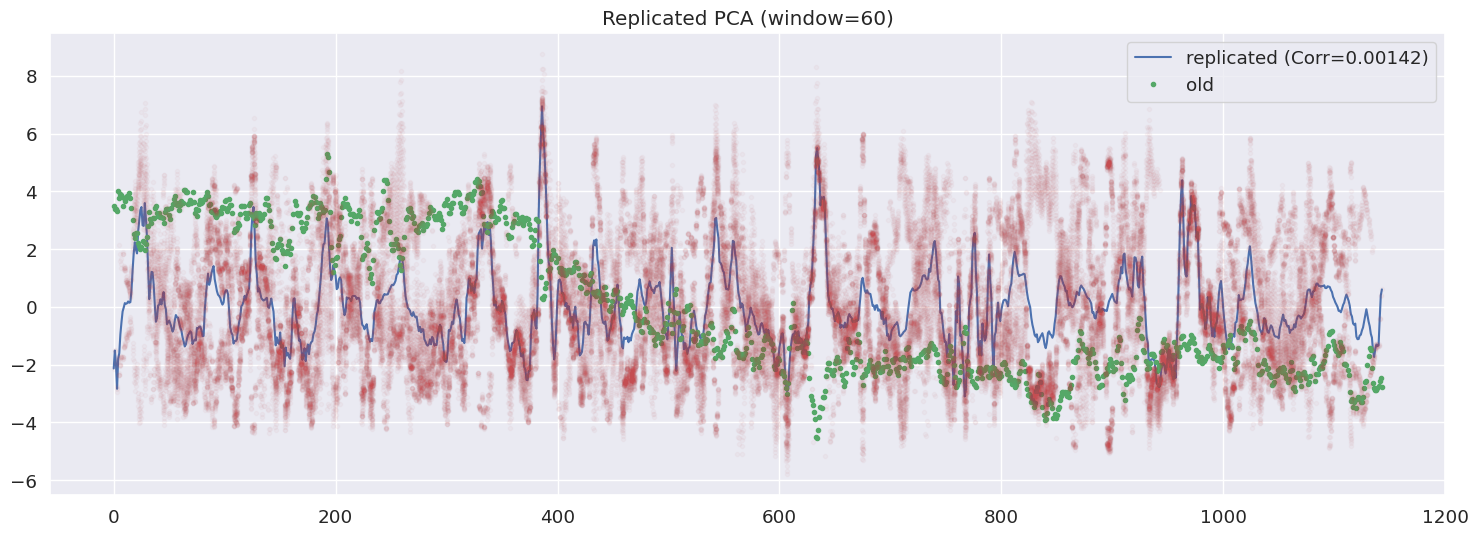

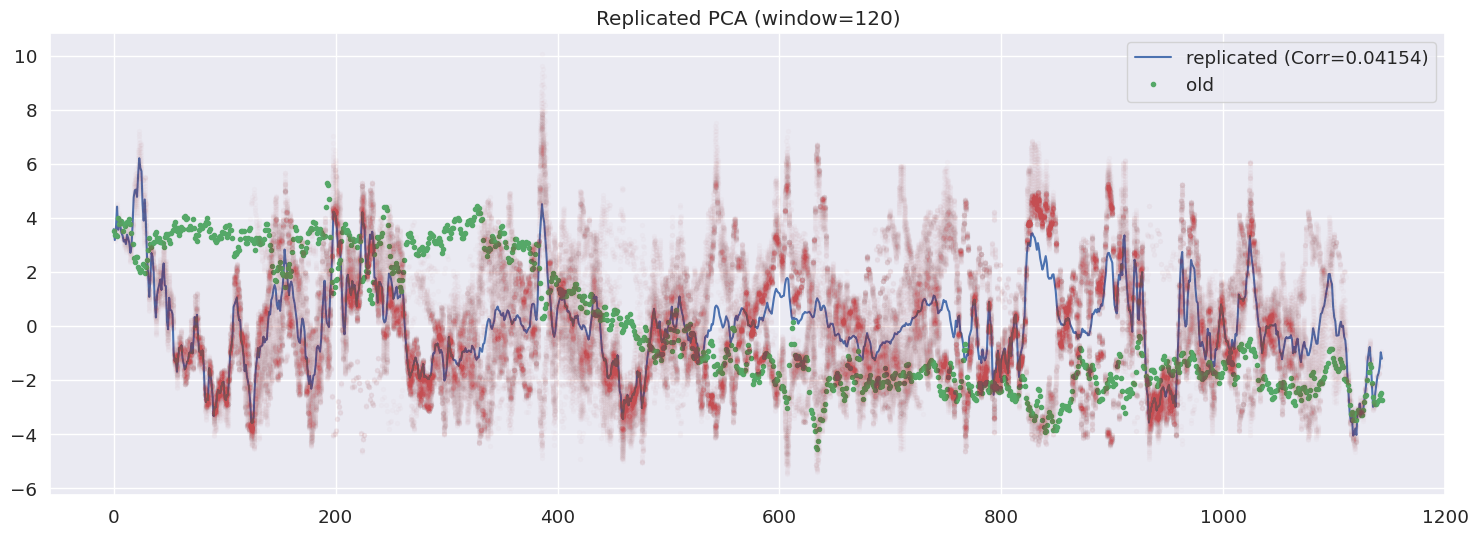

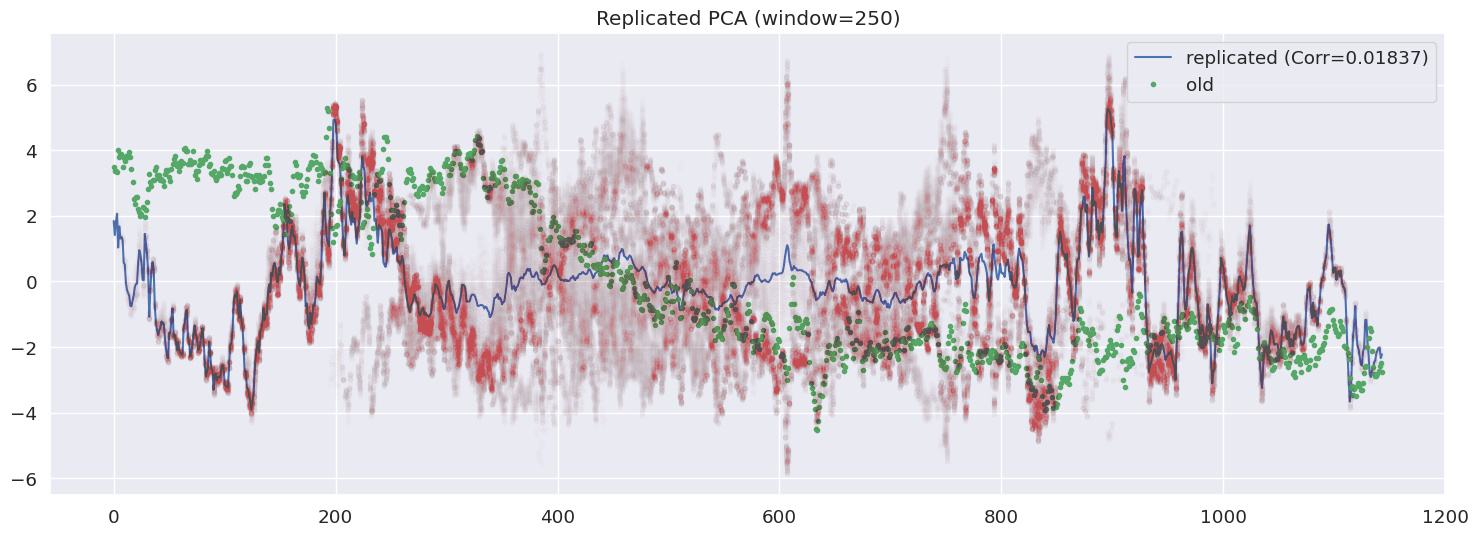

In [23]:
for window in tqdm([60, 120, 250]):#, 500, 800, 1000]):
    res = [pd.Series([np.nan]*i + list(get_pc1(df_var.iloc[i:i+window], scale=True)) + [np.nan]*(len(df_var)-i-window)) 
     for i in range(len(df_var)-window+1)]
    res_df = pd.concat(res, axis=1)
    fig, ax = plot_check_pca(res_df.mean(axis=1), old_var, title=f' (window={window})')
    ax.plot(res_df, '.r', alpha=2/window);

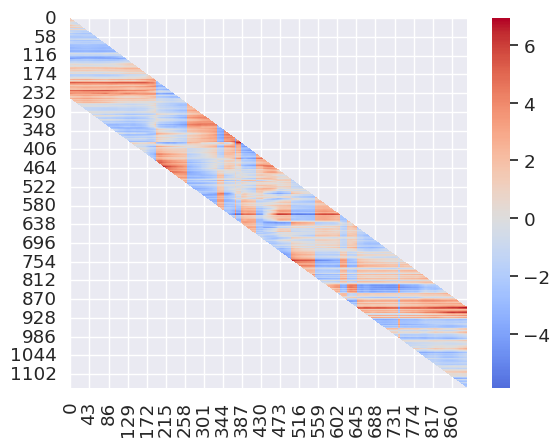

In [24]:
sns.heatmap(res_df, cmap='coolwarm', center=0);

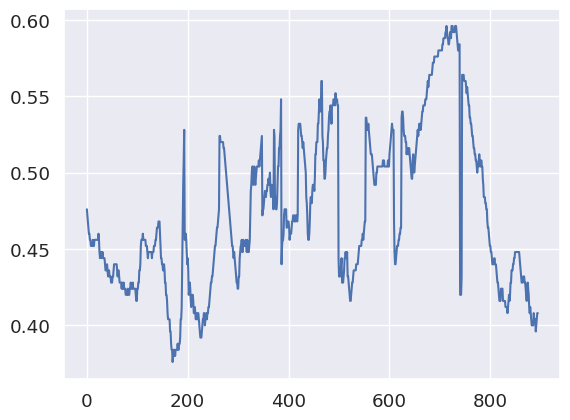

In [25]:
plt.plot((res_df>0).sum()/window);

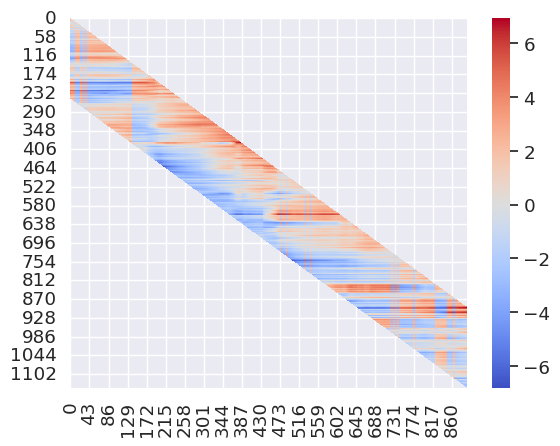

In [26]:
res_df_flip = res_df * (2*(np.diag(res_df)>0)-1)
sns.heatmap(res_df_flip, cmap='coolwarm', center=0);

100%|█████████████████████████████████████████████| 6/6 [00:10<00:00,  1.81s/it]


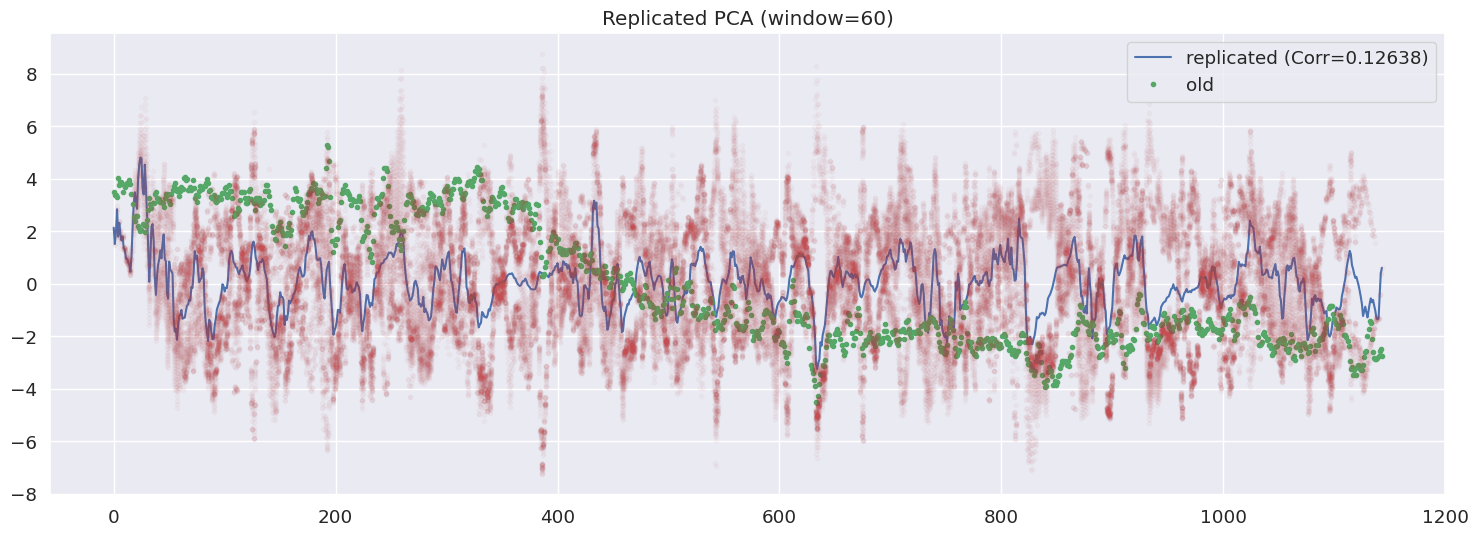

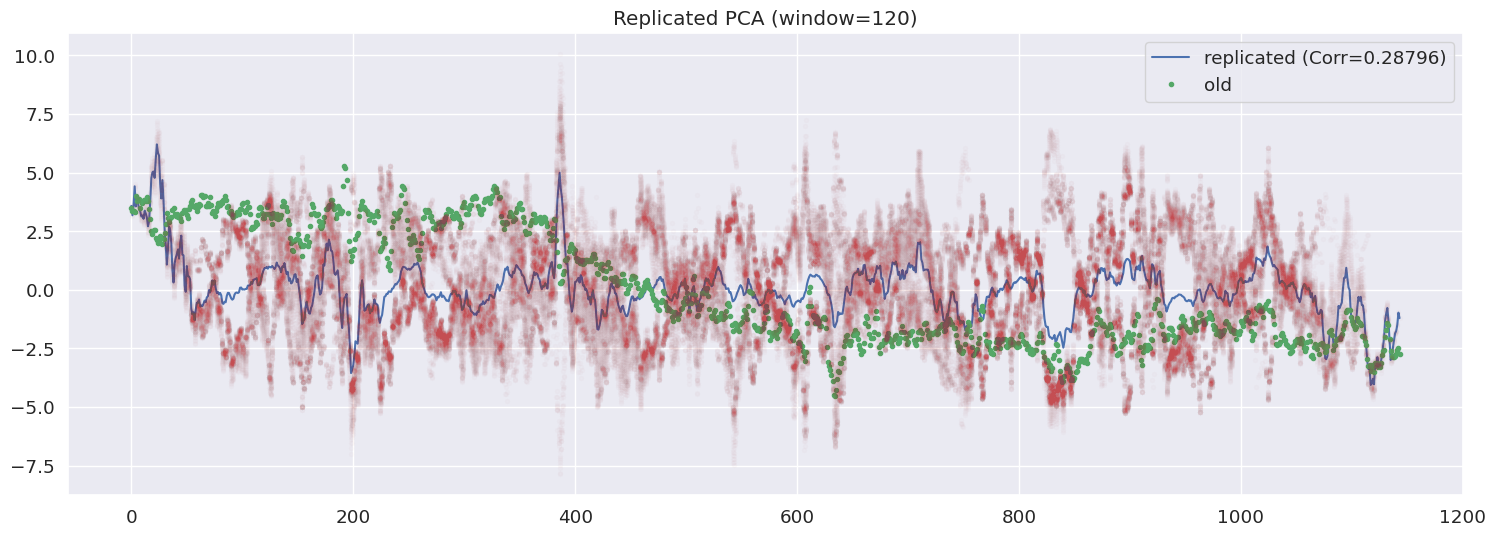

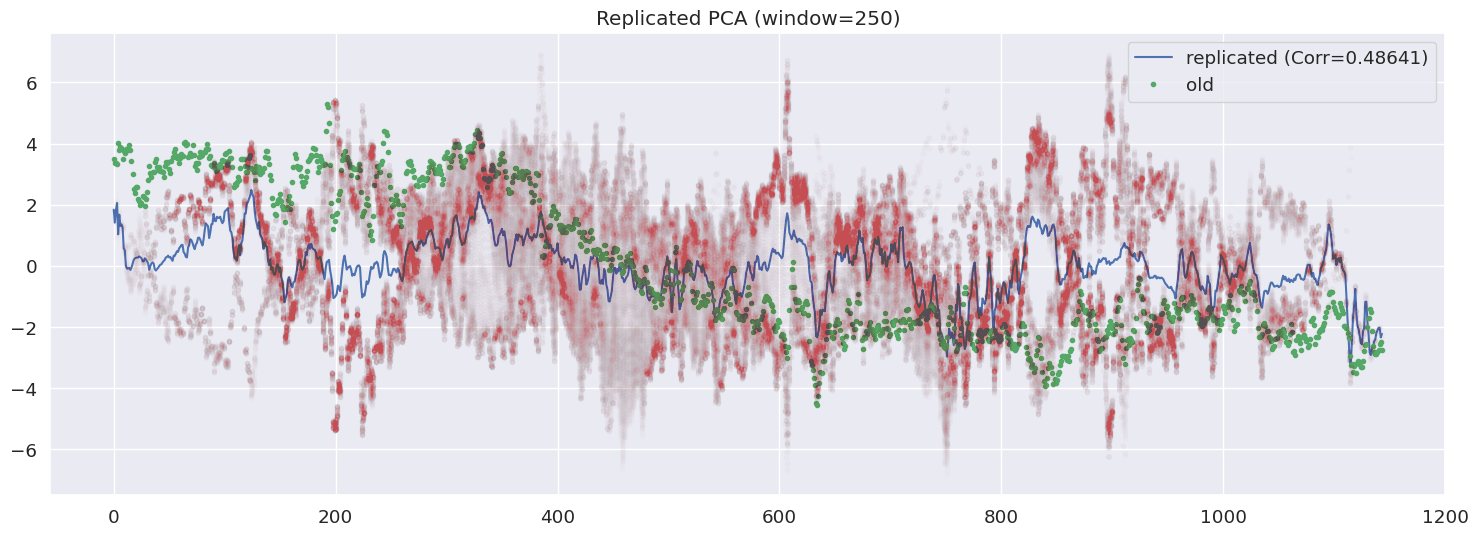

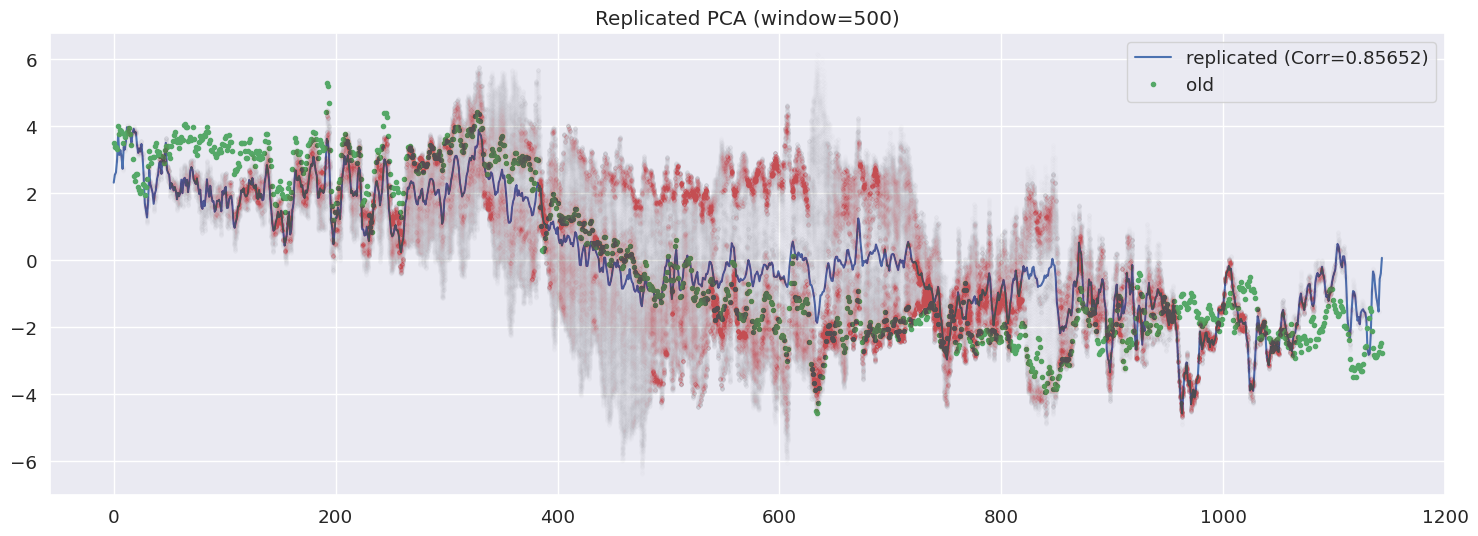

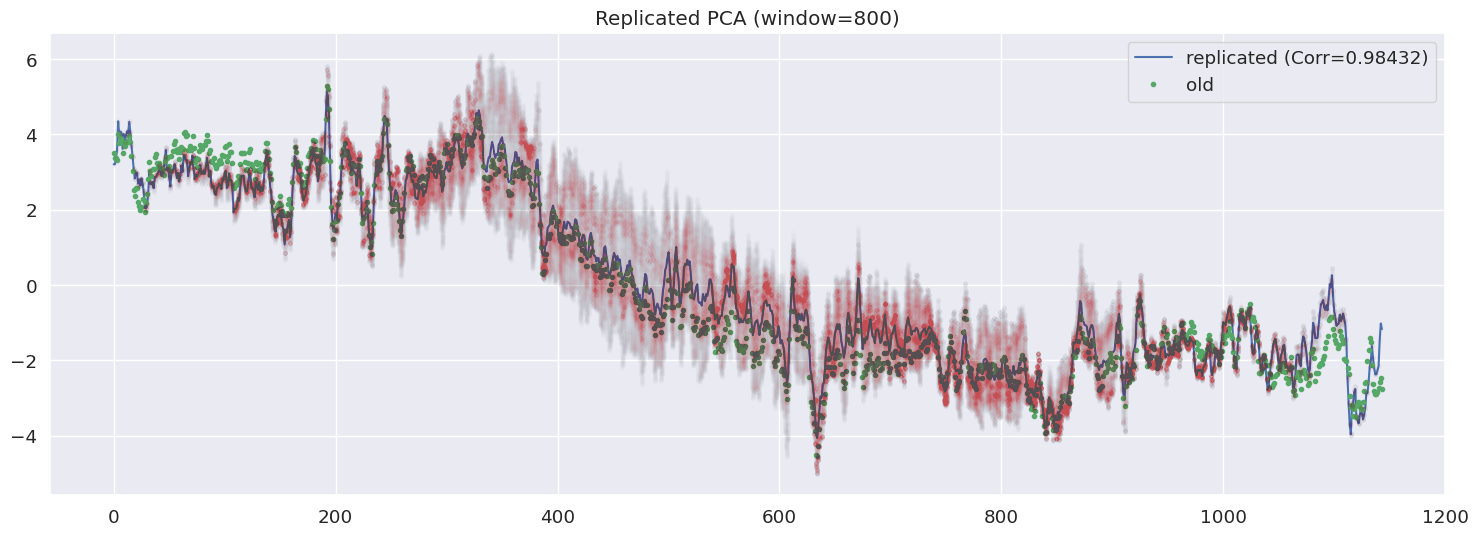

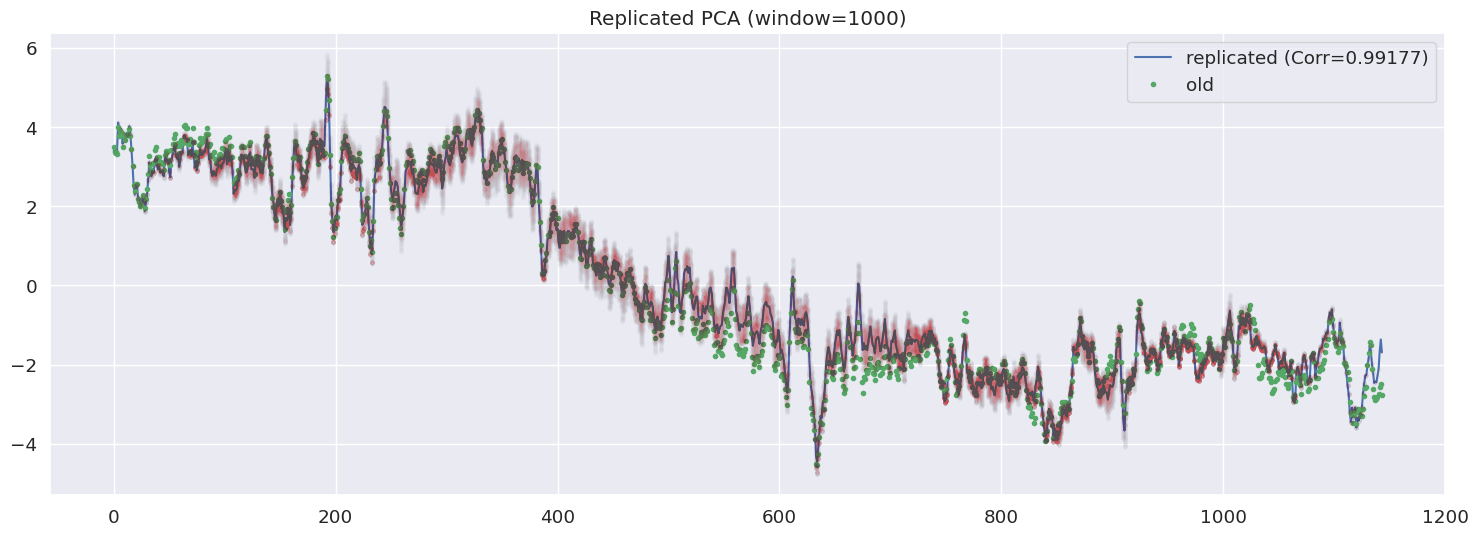

In [27]:
for window in tqdm([60, 120, 250, 500, 800, 1000]):
    res = [pd.Series([np.nan]*i + list(get_pc1(df_var.iloc[i:i+window], scale=True)) + [np.nan]*(len(df_var)-i-window)) 
     for i in range(len(df_var)-window+1)]
    res_df = pd.concat(res, axis=1)
    res_df_flip = res_df * (2*(np.diag(res_df)>0)-1)
    fig, ax = plot_check_pca(res_df_flip.mean(axis=1), old_var, title=f' (window={window})')
    ax.plot(res_df_flip, '.r', alpha=2/window); 